In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [219]:
sales_data = pd.read_csv("data\Sales_Data.csv", sep=",")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Mockba\AppData\Local\Temp\ipykernel_22620\3395886709.py:1: SyntaxWarning: invalid escape sequence '\S'
  sales_data = pd.read_csv("data\Sales_Data.csv", sep=",")


In [220]:
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [221]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [222]:
sales_data.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [223]:
sales_data.drop(columns="Unnamed: 0", inplace=True)

In [224]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


## RESUMEN DE LOS DATOS:
 - Eliminamos la columna 0 ya que la misma no tiene datos significativos. La misma columna contenia el conteo de las filas.  
 - Cuenta con 9 (nueve) columnas con **185.950** registros, No presenta **Datos Nulos**.  
 - Cambiaremos el tipo de dato de la columna "Order Date" de Object -> Datetime

In [225]:
sales_data["Order Date"] = pd.to_datetime(arg=sales_data["Order Date"])

In [226]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [227]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [228]:
sales_data["Sales"].describe()

count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64

## Informacion de los Datos
# Variables de Entrada:
- Order ID: Numerico. Considerarlas claves primarias  
- Product: Productos. Categorico ('Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer')
- Quantity Ordered: Numerico. Cantidades ordenadas.  
- Price Each: Numerico. Precio de ventas.  
- Order Date: Fecha. Fecha de la venta / Dia de la venta.
- Purchase Address: Direccion de la residencia. 
- Month: Numerico. variable **Discreta**. Representan los Meses del año.
- Sales: Numerico. variable **Discreta**. Representan el valor de las ventas.
- City: Ciudades. **Categorico** (' New York City', ' San Francisco', ' Atlanta', ' Portland',  ' Dallas', ' Los Angeles', ' Boston', ' Austin', ' Seattle')  
- Hour: Horas. Numerico. variable **Discreta**. Los registros indican en la hora que realizo la compra.

## Analisis Univariado

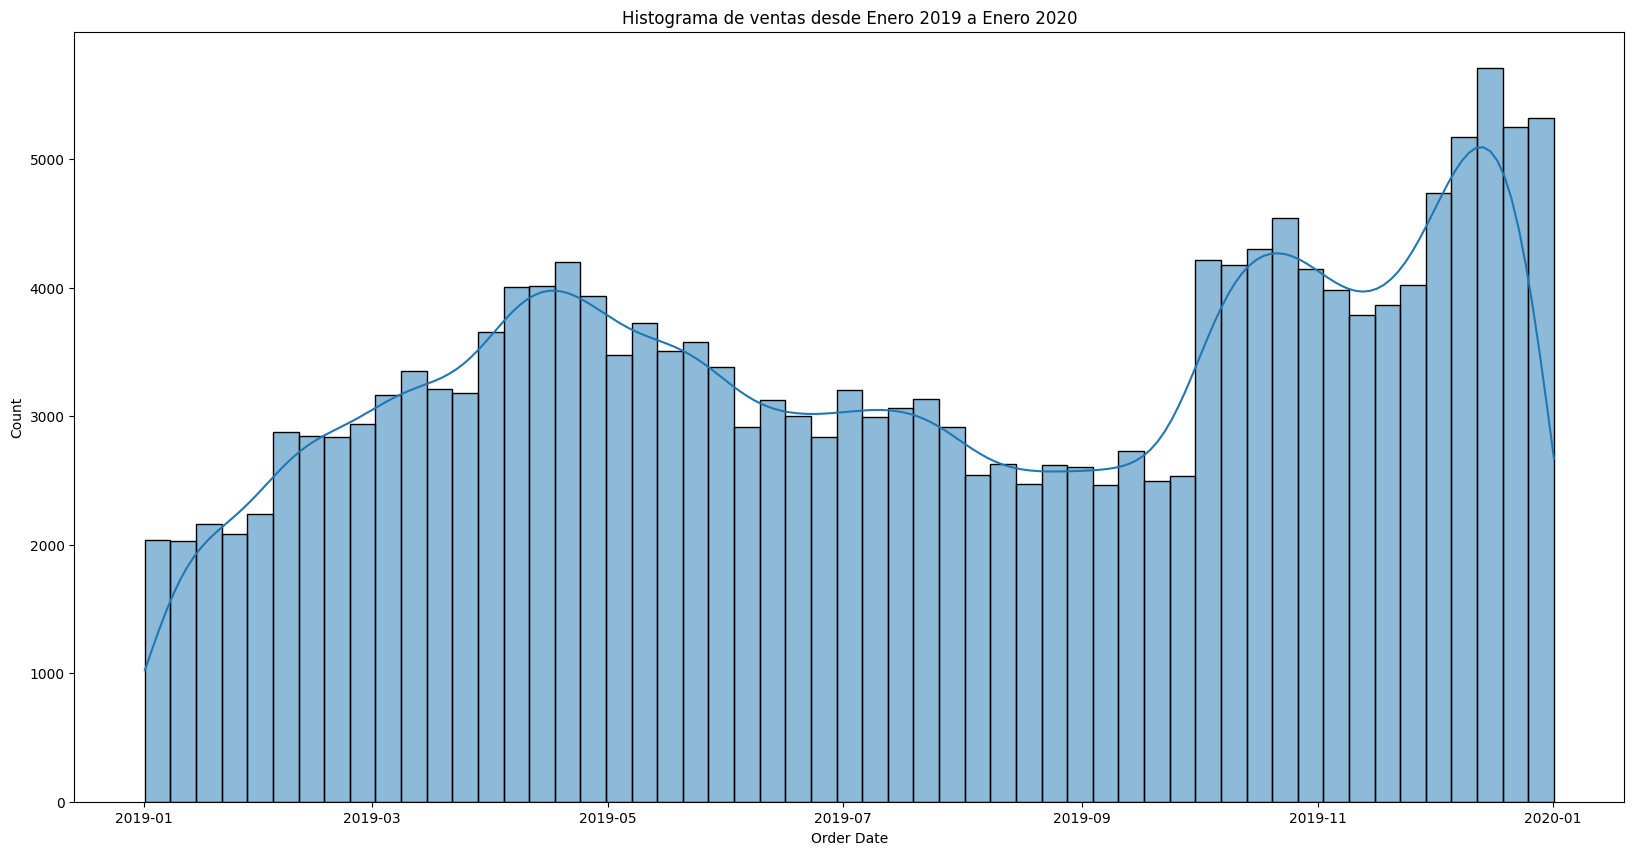

In [229]:
plt.figure(figsize=(20,10))
plt.title("Histograma de ventas desde Enero 2019 a Enero 2020")
sns.histplot(data=sales_data,x="Order Date", kde=True)
plt.show()

# Observacion

Puedo observar que las ventas tuvieron un incremento considerable en los primeros meses del año 2019, luego tuvo un pequeño bajon sin embargo seguia con buena cantidad de ventas. Como suele ocurrir a lo largo del año lleganfo a los meses finales las ventas explotan.

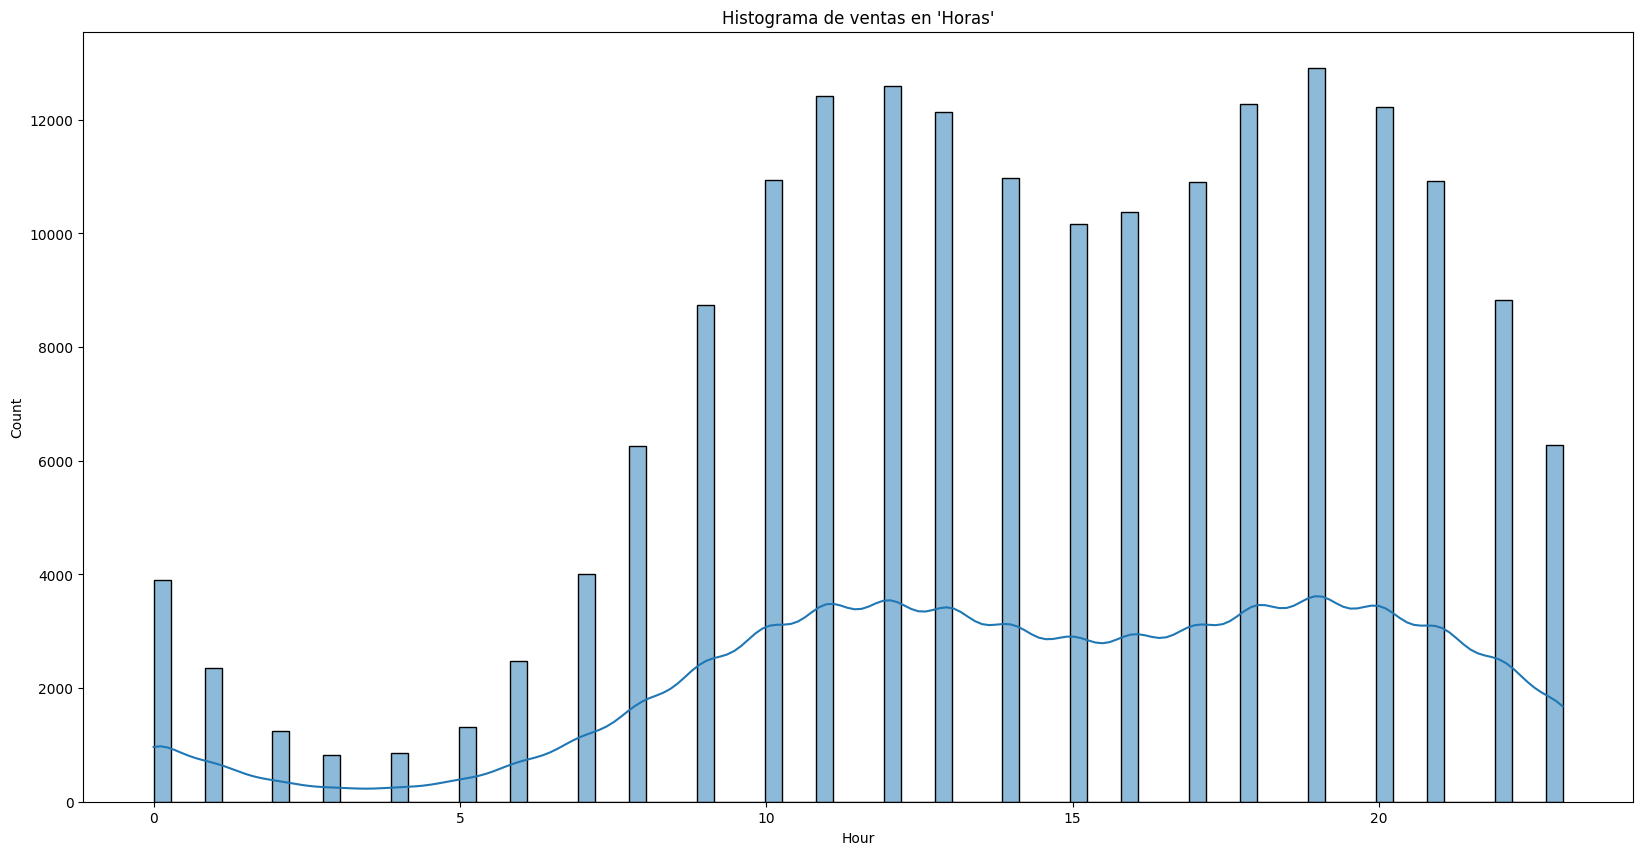

In [230]:
plt.figure(figsize=(20,10))
plt.title("Histograma de ventas en 'Horas'")
sns.histplot(data=sales_data,x="Hour", kde=True)
plt.show()

# Observacion

- Se puede observar que los volumenes de ventas se concentran entre las 7 a 22 hs. Se puede deducir que los clientes de la tienda compran entre esas horas.
Resulta interezante que la tienda esta abierta las 24 hs.

- Podemos observar que los datos presentan una cola a la izquierda.

## **Planteamientos de Objetivos**

Los objetivos del analisis: 

- Reconocer patrones de compra de los clientes -> Influyen la hora en la compra?, Cuales son los prductos mas vendidos y porque?
- Clasificar a los clientes segun sus patrones -> Reconocer los patrones de los clientes al momento de realizar la compra. Porque los clientes compran ese producto? sera que tienen objetos que necesitan ese producto, los precios influyen?
- Crear objetivos de ventas de acuerdo a la clasificacion de los clientes. -> Crear ofertas/campaña de ventas para liberar stock parado o pocas ventas. Cual seria el mejor precio? 

## Enriquecimiento de los Datos

# Variables Derivadas:

- Dia de la semana: Añadiremos Dias de la semana, a partir de la  fecha de compra. Con el fin de encontrar patrones de compra  
- Momento del dia: Crearemos franjas de acuerdo a las horas de compra, serian: "Mañana", "Tarde" y "Noche".


In [231]:
## Funcion para categorizar los momentos del dia

def momento_del_dia(hora):

    if 6 <= hora < 12: return "Morning /  Mañana"
    elif 12 <= hora < 18: return "Afternoon / Tarde"
    else: return "Evening / Noche"

sales_copy = sales_data.copy()

sales_copy["Momento del Dia"] = sales_copy["Hour"].apply(momento_del_dia)

In [232]:
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Momento del Dia   185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 15.6+ MB


In [233]:
## Dia de la semana

sales_copy["Day"] = sales_copy["Order Date"].dt.day_name()

In [234]:
sales_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Momento del Dia,Day
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Evening / Noche,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning / Mañana,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening / Noche,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon / Tarde,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon / Tarde,Wednesday


In [235]:
## Funcion para categorizar los trimestres del año
def trimestre_del_año(mes:int):

    if 1 <= mes <=3: return "Primer Trimestre"
    elif 4 <= mes <= 6: return "Segundo Trimestre"
    elif 7 <= mes <= 9: return "Tercer Trimestre"
    else: return "Cuarto Trimestre"

sales_copy["Trimestre"] = sales_copy["Month"].apply(trimestre_del_año)

In [236]:
sales_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Momento del Dia,Day,Trimestre
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Evening / Noche,Monday,Cuarto Trimestre
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning / Mañana,Sunday,Cuarto Trimestre
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening / Noche,Thursday,Cuarto Trimestre
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon / Tarde,Sunday,Cuarto Trimestre
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon / Tarde,Wednesday,Cuarto Trimestre


## Análisis Exploratorio (EDA) con Insights Relevantes  
Algunas preguntas clave que responder:  

A. Análisis de Ventas y Tendencias
- ¿Cuáles son los meses con más ventas? (Month vs Total Sales)  
- ¿Hay días específicos con mayor demanda? (Day of the Week vs Total Sales)  
- ¿En qué horarios se hacen más compras? (Hour vs Total Sales)

In [237]:
meses_ventas = sales_copy.groupby("Month")["Sales"].sum().reset_index()

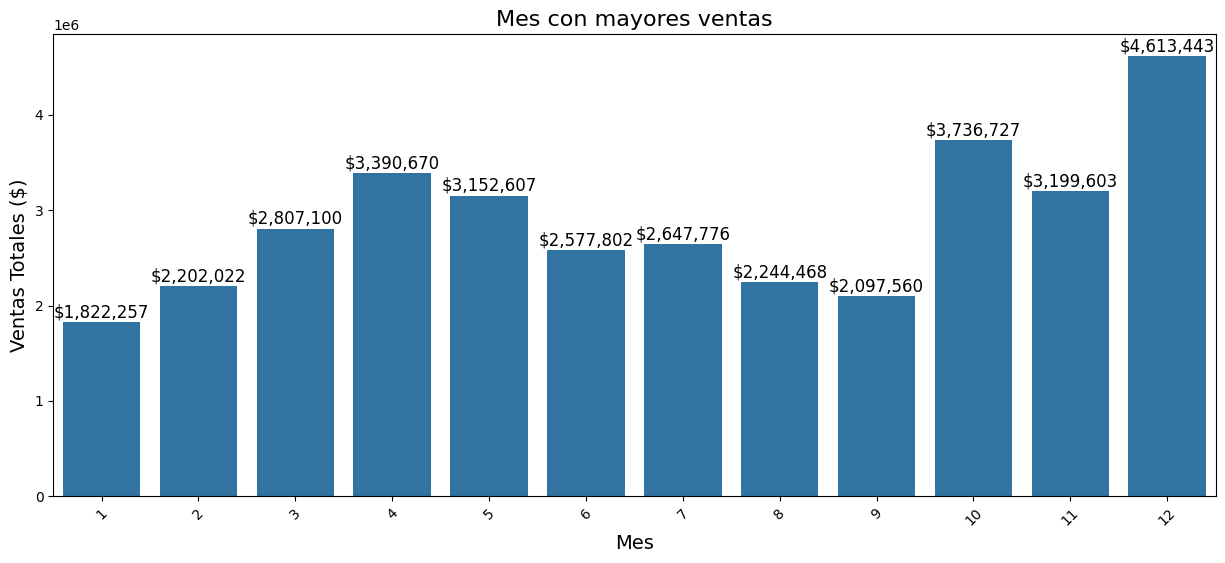

In [238]:
plt.figure(figsize=(15,6))
plt.title("Mes con mayores ventas", fontsize=16)
sns.barplot(data=meses_ventas, x="Month", y="Sales")
for i, total in enumerate(meses_ventas["Sales"]):
    plt.text(i, total + 50000, f"${total:,.0f}", ha='center', fontsize=12)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Ventas Totales ($)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [239]:
ventas_horas = sales_copy.groupby("Hour")["Sales"].sum().sort_index(ascending=True).reset_index()


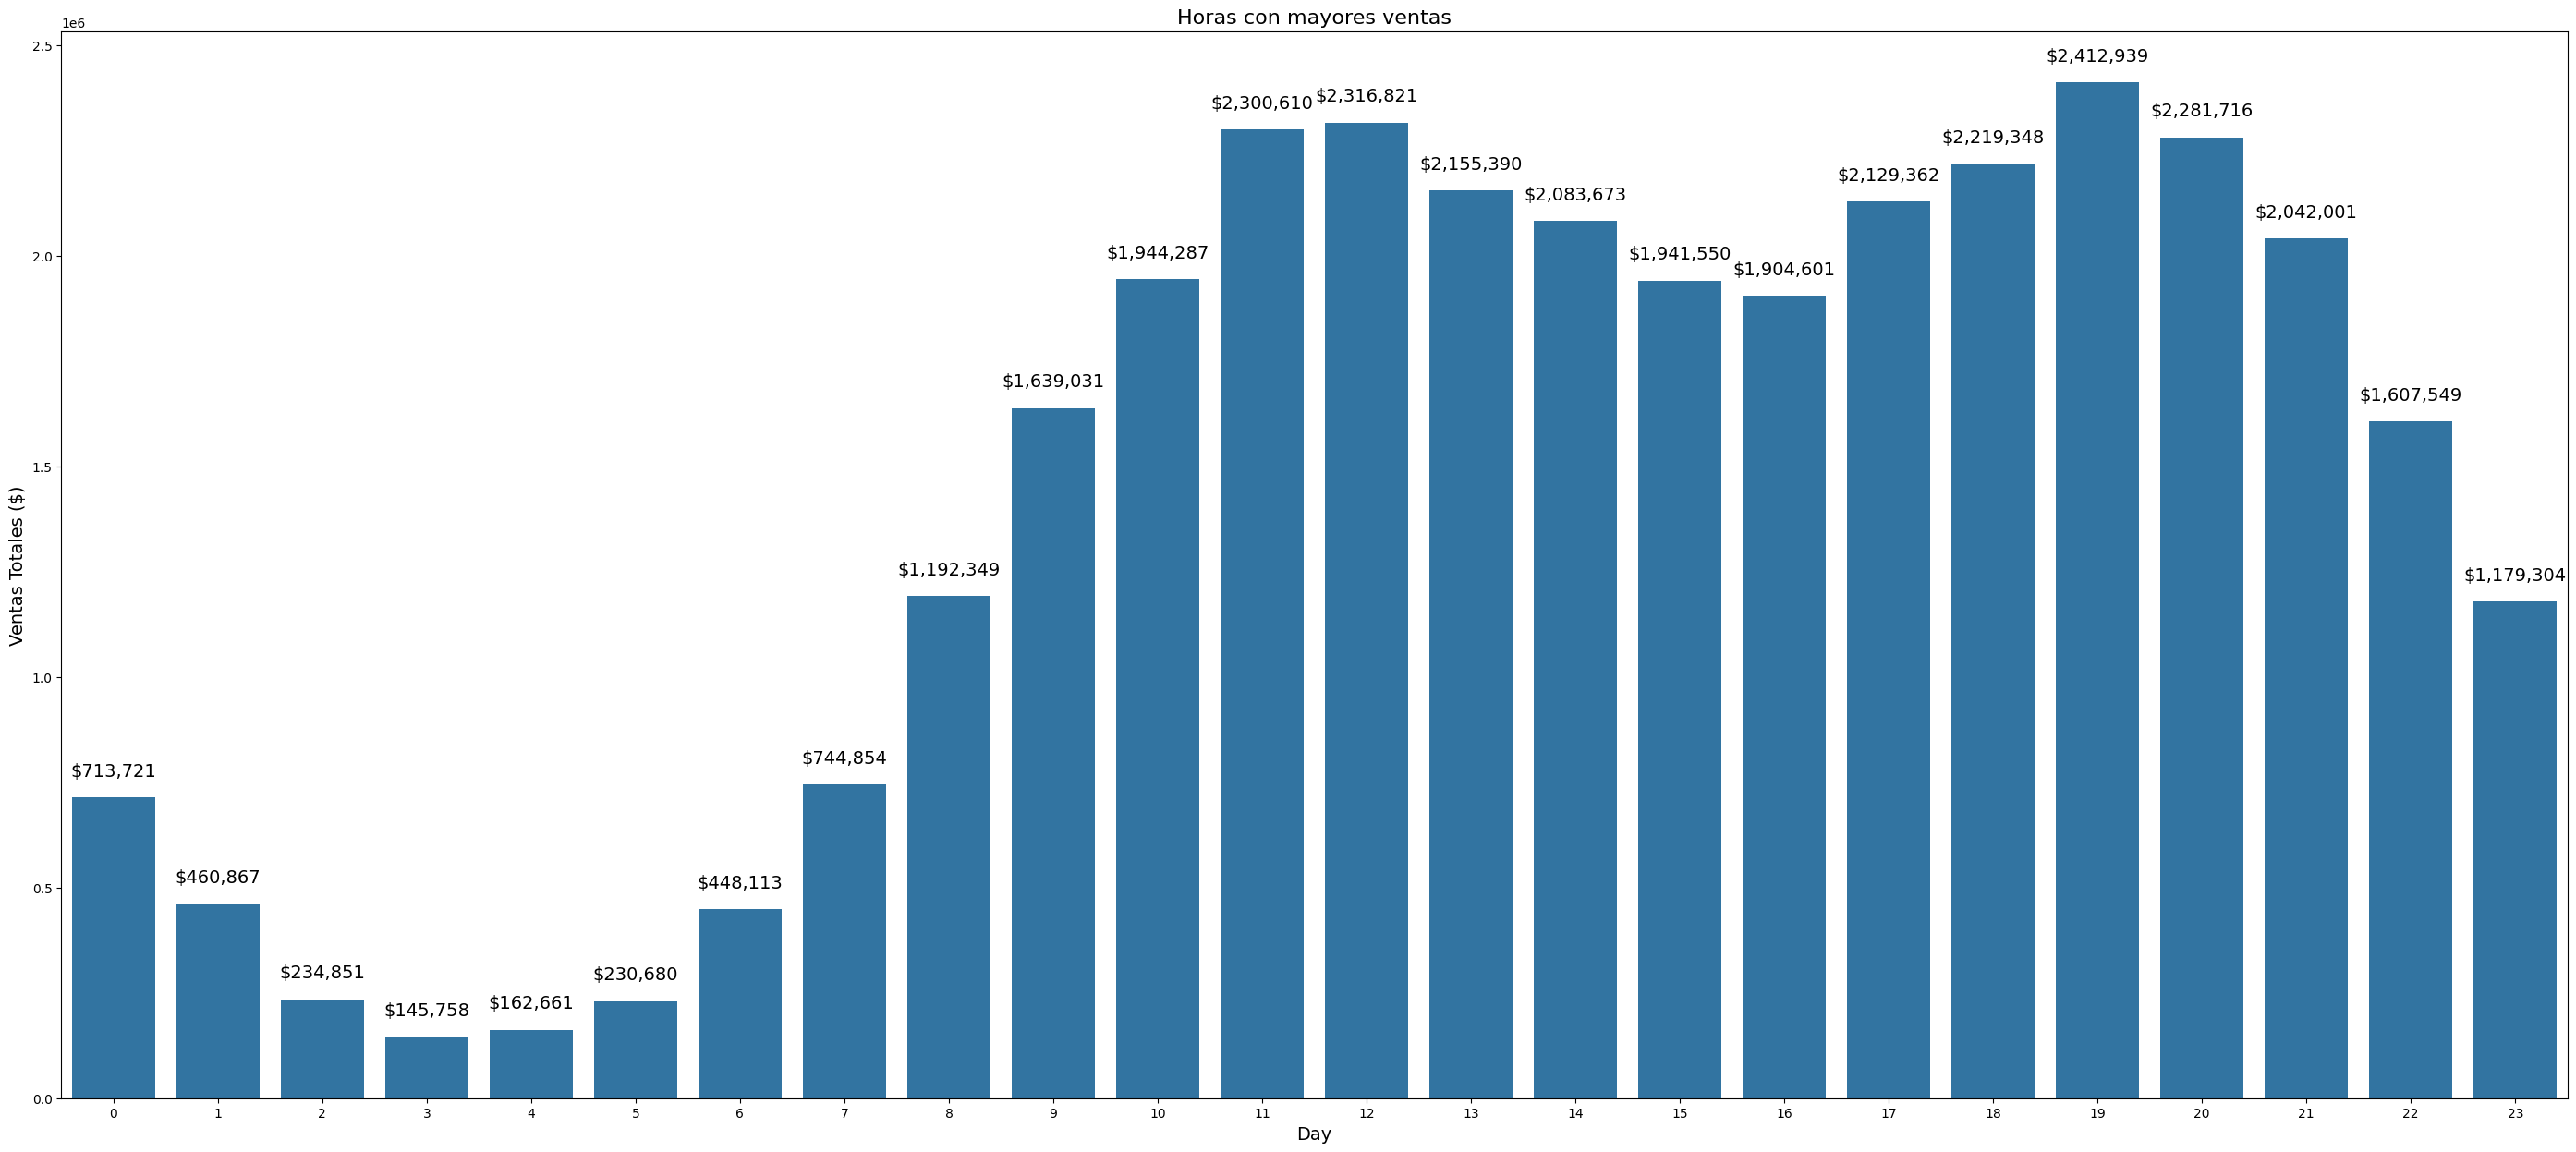

In [240]:
plt.figure(figsize=(35,15))
plt.title("Horas con mayores ventas", fontsize=16)
sns.barplot(data=ventas_horas, x="Hour", y="Sales")
for i, total in enumerate(ventas_horas["Sales"]):
    plt.text(i, total + 50000, f"${total:,.0f}", ha='center', fontsize=14)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Ventas Totales ($)", fontsize=14)
plt.xticks()
plt.show()

## Observaciones

Se pueden obervar en los graficos agrupados lo siguiente:

Agrupacion por meses: En el mismo podemos observar que las ventas son constantes, quiere decir que los clientes frecuentan mucho la tienda, tambien que a lo largo del año los meses mas importante, donde se registran mas ventas son entre los meses de **"Marzo a Mayo"** y los ultimos tres meses del año que son **"Octubre a Diciembre"**

Agrupacion por Hora: Se puede observar que los volumenes de ventas se concentran entre las 7 a 22 hs. Se puede deducir que los clientes de la tienda compran entre esas horas. Resulta interezante que la tienda esta abierta las 24 hs.

**Podemos concluir que nuestra tienda es Online, abierta las 24hs del dia. Nos falta agregar mas granularidad a nuestros datos, con el fin de identificar patrones de compra de nuestro clientes**

## Análisis de Productos
- ¿Cuáles son los productos más vendidos?  
- ¿Qué productos generan más ingresos?  

In [241]:
productos_ordenados = sales_data.groupby("Product")["Quantity Ordered"].sum().sort_values(ascending=False).reset_index()

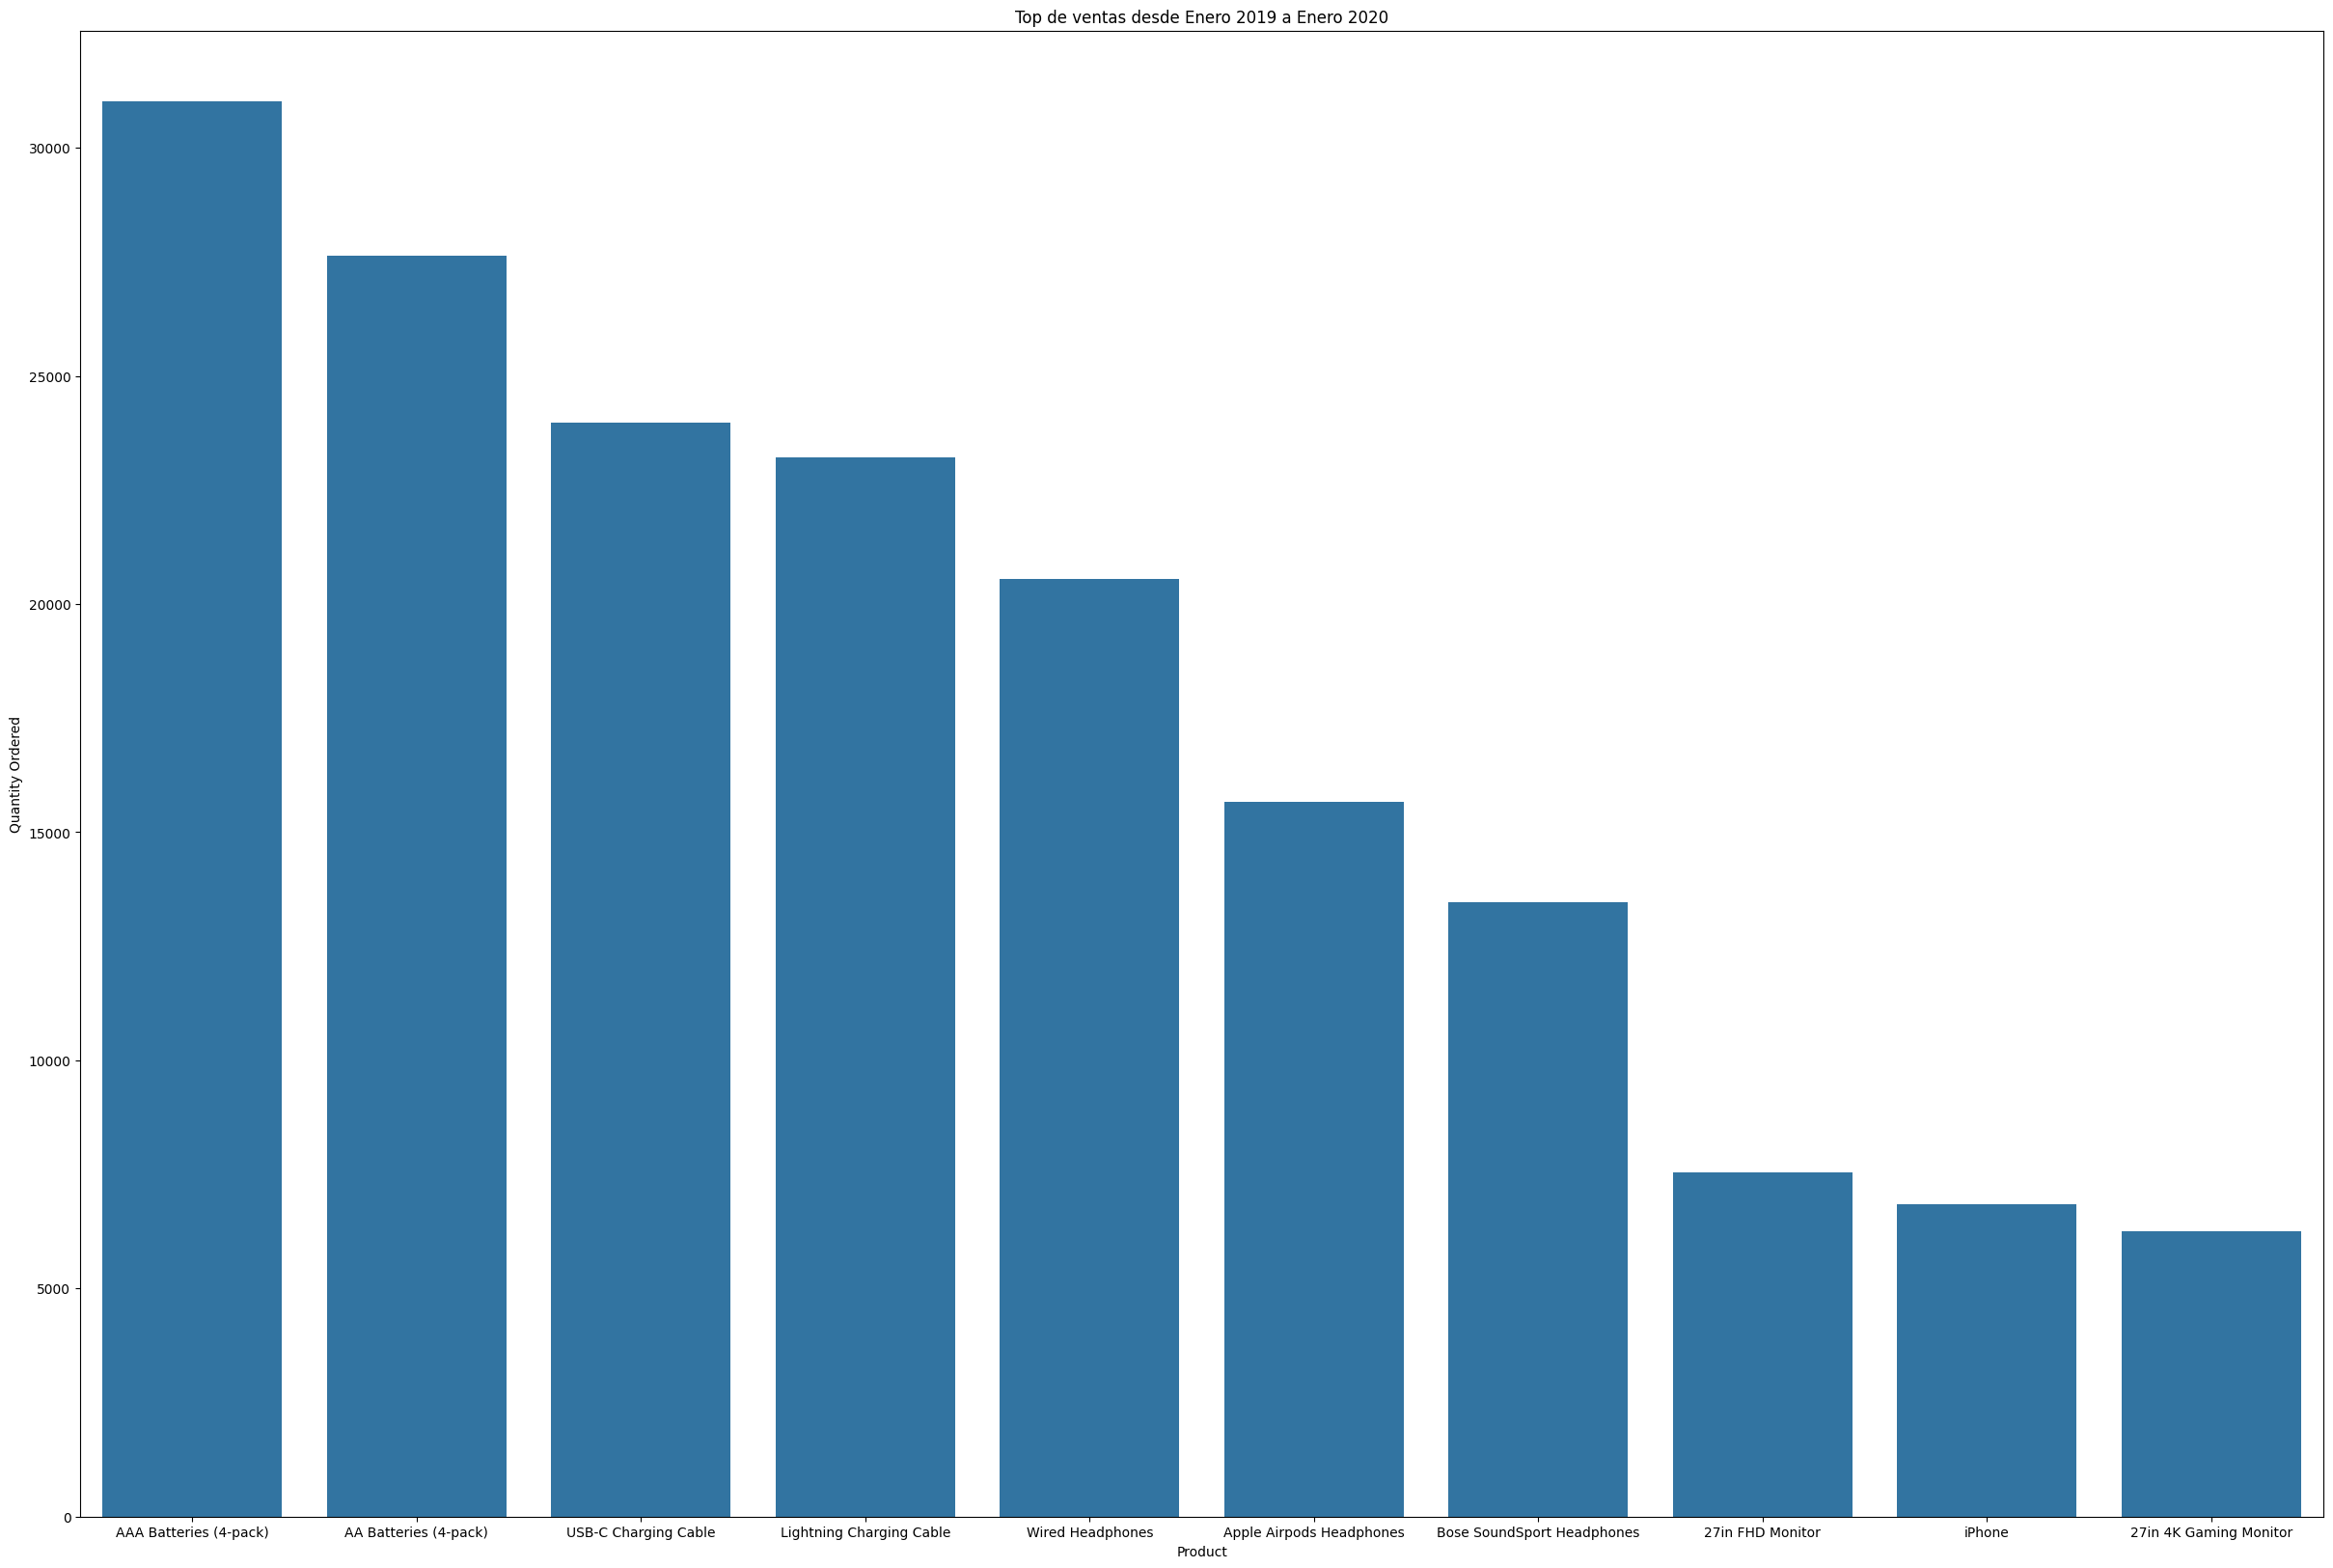

In [242]:
plt.figure(figsize=(30,20))
plt.title("Top de ventas desde Enero 2019 a Enero 2020")
sns.barplot(data=productos_ordenados.head(10),x="Product",y="Quantity Ordered")
plt.show()

## Observaciones:

Se puede observar en la grafica cuales fueron los productos mas vendidos a lo largo del año.

Cuales serian los productos con mayor ganancia?. Lo averiguaremos

Añadiremos una columna nueva para etiquetar los productos asi poder agruparlos por categorias.

Con el Fin de clasificar a los compradores por cuidad para asi predecir las ventas o crear campañas acorde a ello.

In [243]:
productos_ingresos = sales_copy.groupby("Product")["Sales"].sum().sort_values(ascending=False).reset_index()

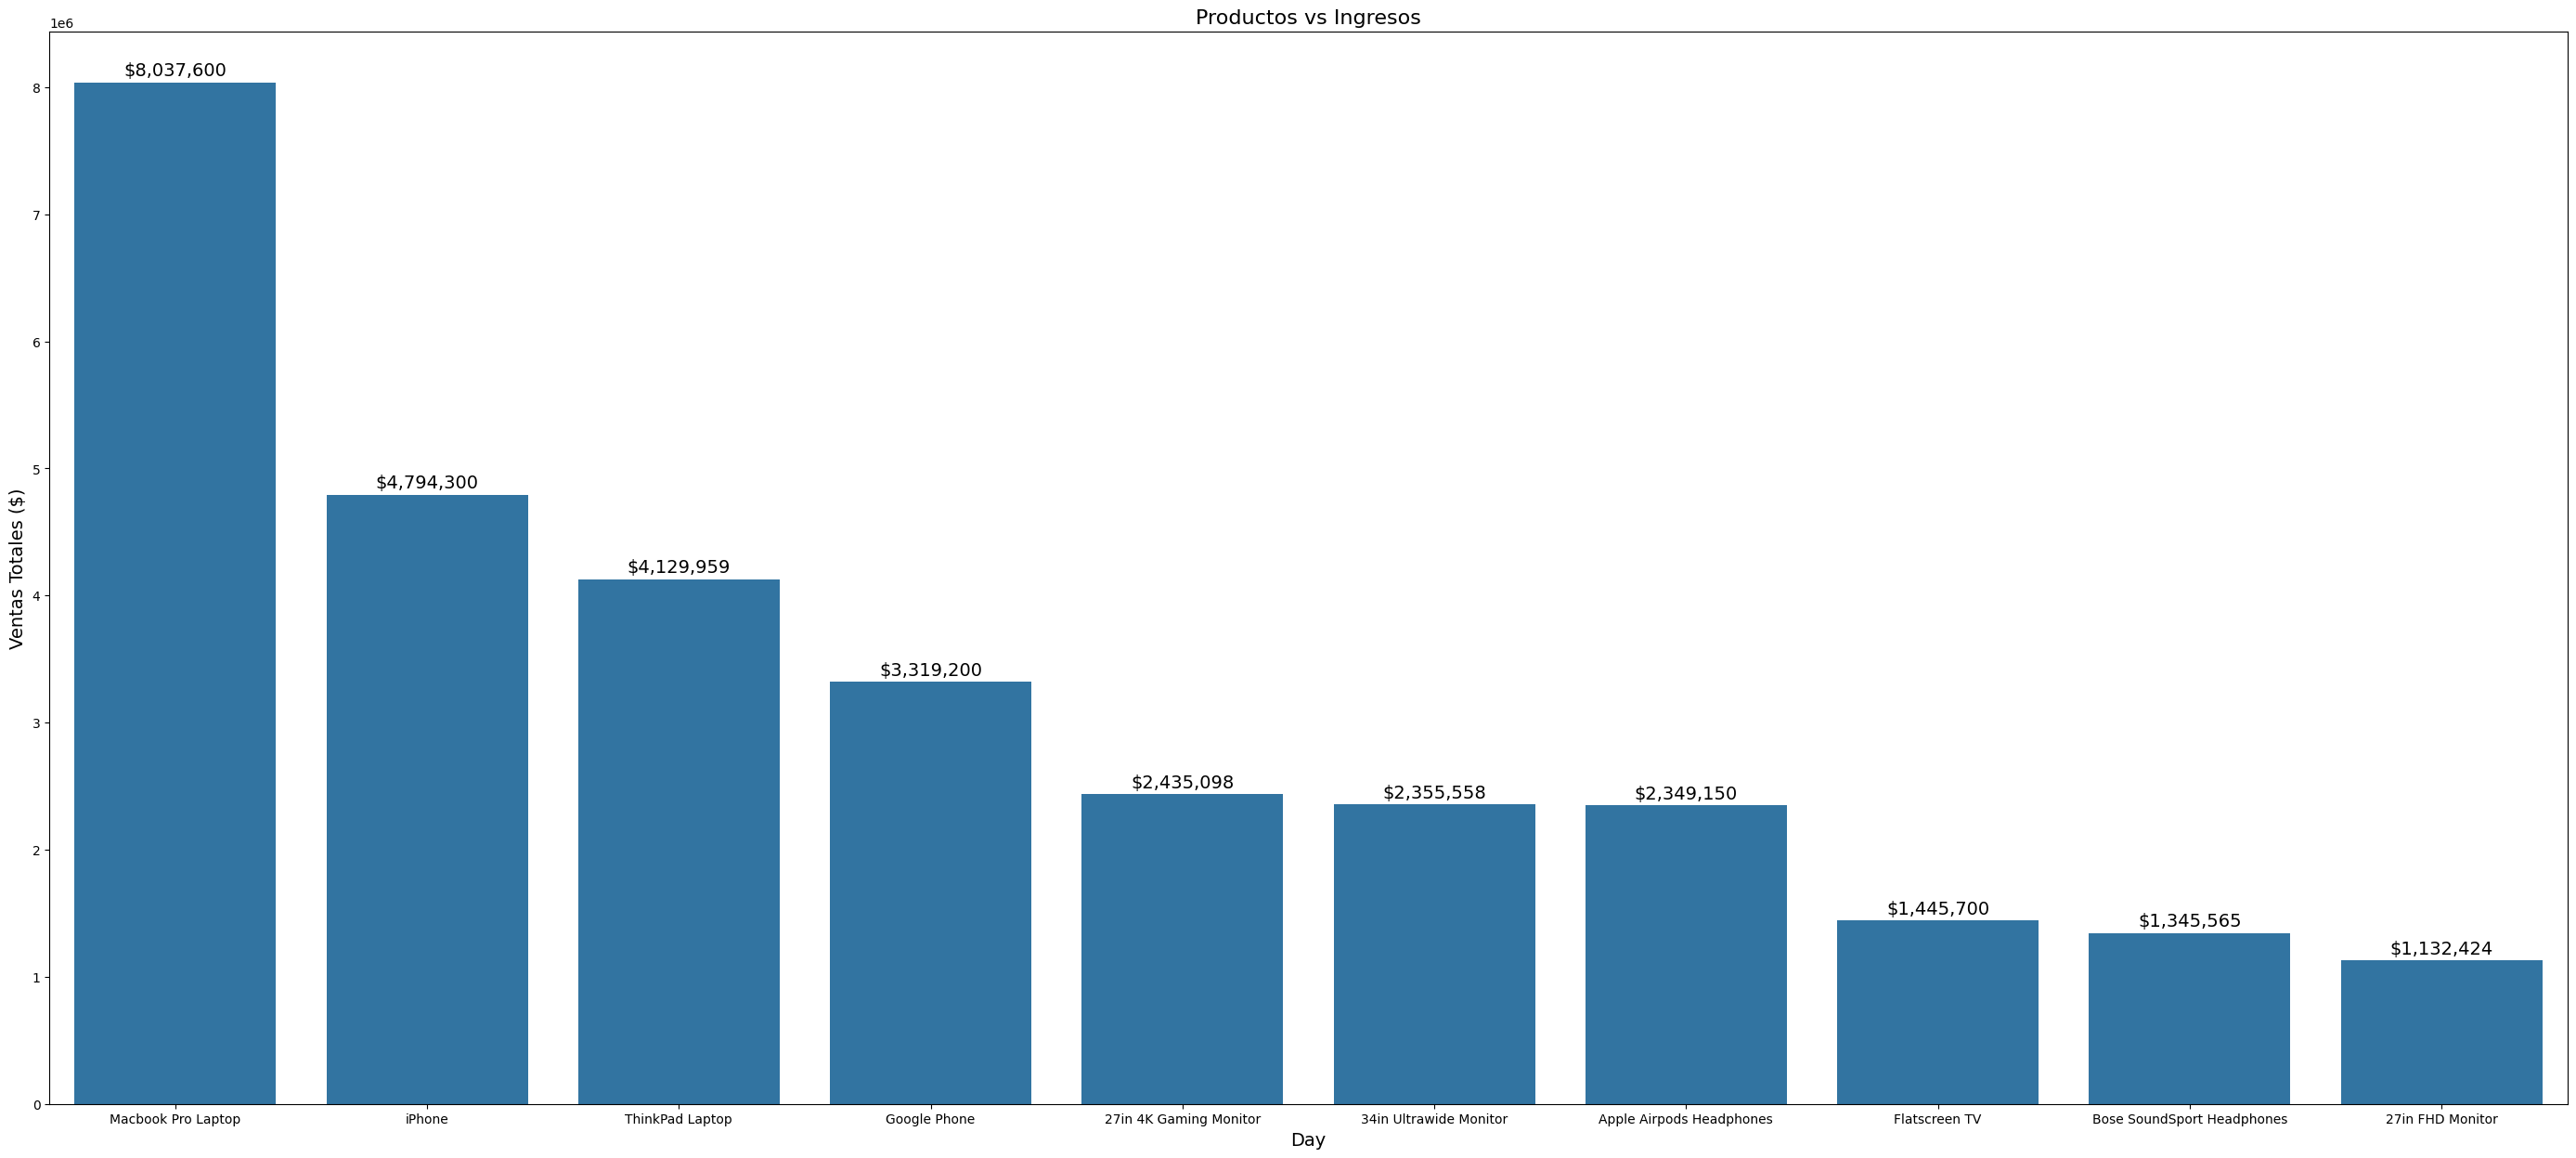

In [244]:
plt.figure(figsize=(35,15))
plt.title("Productos vs Ingresos", fontsize=16)
sns.barplot(data=productos_ingresos.head(10), x="Product", y="Sales")
for i, total in enumerate(productos_ingresos["Sales"].head(10)):
    plt.text(i, total + 50000, f"${total:,.0f}", ha='center', fontsize=14)
plt.xlabel("Day", fontsize=14)
plt.ylabel("Ventas Totales ($)", fontsize=14)
plt.xticks()
plt.show()

## Observacion

Los productos que generan mayores ganancias son casualmente los que menos unidades vendidas tienen. Eso es algo muy bueno, ya que los productos mas caros son aquellos que se venden en un buen volumen.


## Análisis por Ubicación
- ¿Qué ciudades generan más ventas?
- ¿Existen productos con mejor desempeño en ciertas ciudades?

In [245]:
ciudades = sales_copy["City"].value_counts()

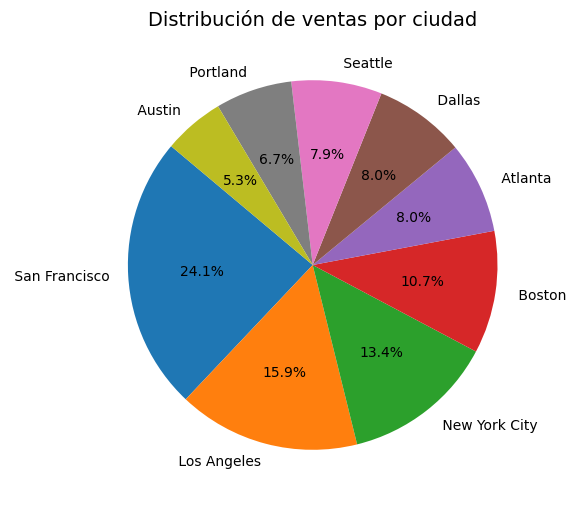

In [246]:
plt.figure(figsize=(10, 6))
plt.pie(ciudades, labels=ciudades.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribución de ventas por ciudad", fontsize=14)
plt.show()

¿Qué ciudades generan más ventas?

Las ciudades donde se generan mas ventas son en la cuidad de San Francisco, Los Angeles, NW Y Boston.

In [247]:
ventas_productos_city = sales_copy.groupby(["City", "Product"])["Sales"].sum().sort_values(ascending=False).reset_index()
ventas_productos_city

,City,Product,Sales
0,San Francisco,Macbook Pro Laptop,1931200.00
1,Los Angeles,Macbook Pro Laptop,1276700.00
2,San Francisco,iPhone,1162700.00
3,New York City,Macbook Pro Laptop,1116900.00
4,San Francisco,ThinkPad Laptop,962990.37
...,...,...,...
166,Seattle,AAA Batteries (4-pack),7313.54
167,Atlanta,AAA Batteries (4-pack),7053.41
168,Portland,AAA Batteries (4-pack),6219.20
169,Austin,AA Batteries (4-pack),5468.16


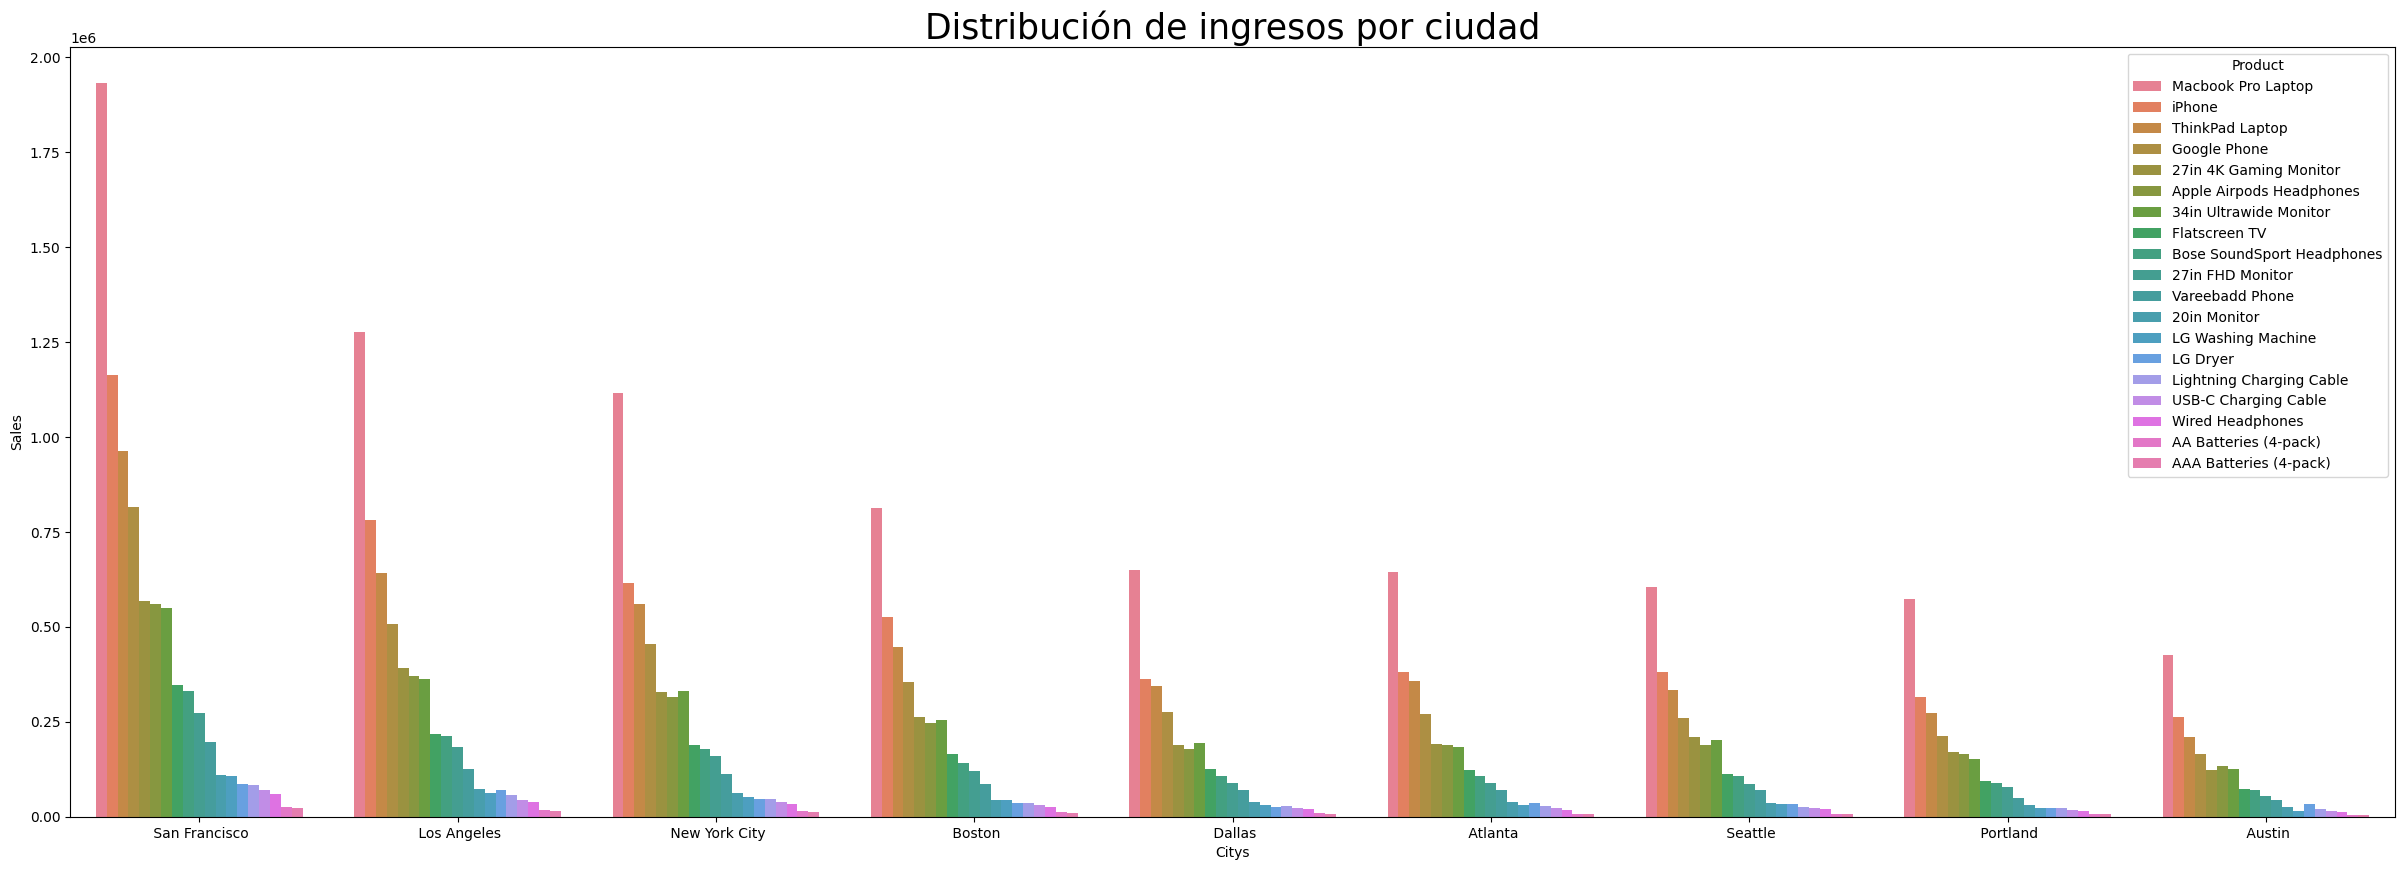

In [248]:
plt.figure(figsize=(30,10))
sns.barplot(data=ventas_productos_city, x="City", y="Sales", hue="Product")
plt.title("Distribución de ingresos por ciudad", fontsize=25)
plt.xlabel("Citys")
plt.show()

¿Existen productos con mejor desempeño en ciertas ciudades?

La respuesta es que si, si existen mejor desempeño en ciertas ciudades. Como se puede observar en el grafico.

Podemos decir que ciertas cuidades tienen mayor solvencia economica para realizar ciertas compras.

In [249]:
## Agregaremos una columna en la cual mencionaremos los salarios promedio por cuidad, eso se refleja mucho en las ventas por cuidad
salarios_promedio_2019 = {
    "New York City": 66790,  # en dólares
    "San Francisco": 75890,
    "Atlanta": 54110,
    "Portland": 58240,
    "Dallas": 71250,  # promedio del año 2020, ya que no encontré datos del 2019
    "Los Angeles": 50815,
    "Boston": 69240,
    "Austin": 51840,
    "Seattle": 68460
}


In [250]:
print("Ciudades en el DataFrame:", sales_copy["City"].unique())
print("Ciudades en el diccionario:", list(salarios_promedio_2019.keys()))

Ciudades en el DataFrame: [' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']
Ciudades en el diccionario: ['New York City', 'San Francisco', 'Atlanta', 'Portland', 'Dallas', 'Los Angeles', 'Boston', 'Austin', 'Seattle']


In [251]:
# Eliminar espacios extra en la columna "City"
sales_copy["City"] = sales_copy["City"].str.strip()

# Ahora hacemos el mapeo correctamente
sales_copy["Avg_Salary"] = sales_copy["City"].map(salarios_promedio_2019)


In [252]:
sales_copy.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour,Avg_Salary
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,64801.899355
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,50815.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,54110.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,68460.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,71250.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,75890.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,9419.201352


# Recomendaciones: 
¿Qué acciones se pueden tomar para mejorar las ventas, optimizar el inventario o la estrategia de marketing?

In [253]:
sales_copy.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour', 'Momento del Dia',
       'Day', 'Trimestre', 'Avg_Salary'],
      dtype='object')

In [254]:
print("Cantidad de registros unicos:",len(sales_copy["Purchase Address"].unique()))
print("Cantidad de registros totales:",len(sales_copy["Purchase Address"]))

Cantidad de registros unicos: 140787
Cantidad de registros totales: 185950


In [255]:
sales_copy["Purchase Address"].value_counts()

Purchase Address
193 Forest St, San Francisco, CA 94016      9
279 Sunset St, San Francisco, CA 94016      8
223 Elm St, Los Angeles, CA 90001           8
662 Chestnut St, San Francisco, CA 94016    7
716 5th St, San Francisco, CA 94016         7
                                           ..
606 Pine St, Portland, OR 97035             1
408 Hickory St, San Francisco, CA 94016     1
464 Ridge St, Boston, MA 02215              1
697 Forest St, Dallas, TX 75001             1
18 Maple St, Boston, MA 02215               1
Name: count, Length: 140787, dtype: int64

In [256]:
clientes_frecuentes = sales_copy.groupby(["City", "Purchase Address", "Month"])["Sales"].sum().sort_values(ascending=False).reset_index()
clientes_frecuentes

,City,Purchase Address,Month,Sales
0,San Francisco,"10 1st St, San Francisco, CA 94016",5,4000.00
1,San Francisco,"668 Park St, San Francisco, CA 94016",4,3779.99
2,Dallas,"548 Jackson St, Dallas, TX 75001",9,3400.00
3,San Francisco,"8 West St, San Francisco, CA 94016",3,3400.00
4,San Francisco,"953 Ridge St, San Francisco, CA 94016",6,3400.00
...,...,...,...,...
174441,Seattle,"186 7th St, Seattle, WA 98101",7,2.99
174442,Boston,"278 Elm St, Boston, MA 02215",9,2.99
174443,Boston,"278 14th St, Boston, MA 02215",2,2.99
174444,Boston,"277 Sunset St, Boston, MA 02215",4,2.99


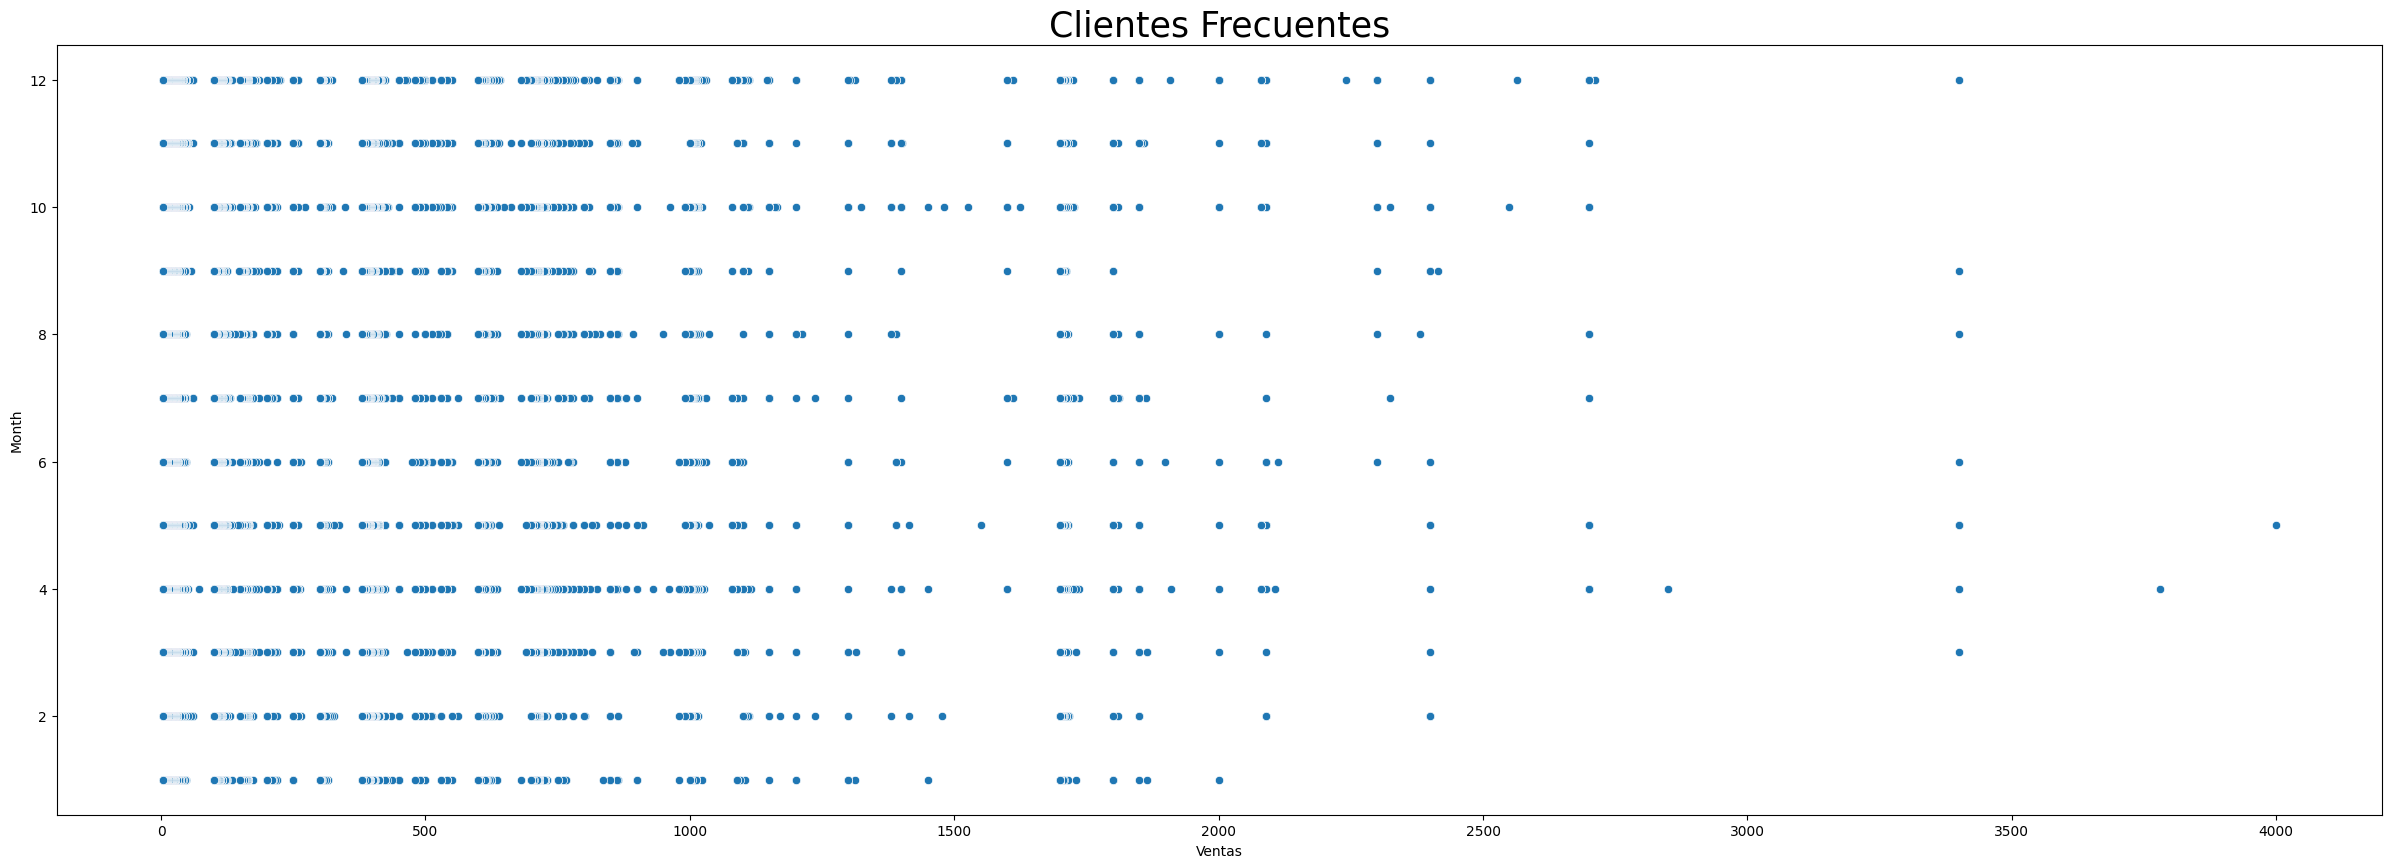

In [257]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=clientes_frecuentes, x="Sales",y="Month")
plt.title("Clientes Frecuentes", fontsize=25)
plt.xlabel("Ventas")
plt.show()

In [258]:
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Momento del Dia   185950 non-null  object        
 11  Day               185950 non-null  object        
 12  Trimestre         185950 non-null  object        
 13  Avg_Salary        185950 non-null  int64         
dtypes: d

## Prueba de Hipotesis con CH2

Buscaremos saber si variables categoricas como "City", "Product", "Momento del Dia", tiene impacto con las ventas "Sales" 

In [259]:
## PASO 1: Hipotesis
# H0: Las variables categoricas "City", "Product", "Momento del Dia" no tienen no tiene impacto a las ventas
# H1: Las variables categoricas tienen impacto en las ventas

# PASO 2: Realizar la prueba
tabla_contigencia = pd.crosstab(index=[sales_copy["City"], sales_copy["Product"]], columns=sales_copy["Momento del Dia"])
display(tabla_contigencia)

# PASO 3: Aplicar la prueba de Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contigencia)

# PASO 4: Evaluar el valor p
print(f"Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p}")

# PASO 5: Interpretar el resultado
alpha = 0.05  # Nivel de significancia
if p < alpha:
    print("Rechazamos H0: Las variables categóricas TIENEN un impacto en las ventas.")
else:
    print("No se puede rechazar H0: No hay evidencia suficiente de que las variables categóricas afecten las ventas.")

Momento del Dia                 Afternoon / Tarde  Evening / Noche  \
City    Product                                                      
Atlanta 20in Monitor                          120              134   
        27in 4K Gaming Monitor                188              189   
        27in FHD Monitor                      225              230   
        34in Ultrawide Monitor                170              199   
        AA Batteries (4-pack)                 600              647   
...                                           ...              ...   
Seattle ThinkPad Laptop                       127              125   
        USB-C Charging Cable                  618              677   
        Vareebadd Phone                        67               72   
        Wired Headphones                      529              619   
        iPhone                                201              218   

Momento del Dia                 Morning /  Mañana  
City    Product                                    
Atlanta 20in Monitor                           84  
        27in 4K Gaming Monitor                115  
        27in FHD Monitor                      129  
        34in Ultrawide Monitor                109  
        AA Batteries (4-pack)                 414  
...                                           ...  
Seattle ThinkPad Laptop                        81  
        USB-C Charging Cable                  409  
        Vareebadd Phone                        40  
        Wired Headphones                      361  
        iPhone                                126  

[171 rows x 3 columns]

Chi-cuadrado: 295.9536500325984
Grados de libertad: 340
Valor p: 0.9592673523825412
No se puede rechazar H0: No hay evidencia suficiente de que las variables categóricas afecten las ventas.


## Prueba de Analisis de Varianza

In [260]:
sales_copy.rename(columns={"Momento del Dia": "Momento_del_Dia"}, inplace=True)

In [261]:
# Definir el modelo con la variable numérica 'Sales' y la categórica 'City'
modelo = smf.ols('Sales ~ C(City) + C(Product) + C(Momento_del_Dia)', data=sales_copy).fit()

# Aplicar ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print(anova_table)

                          sum_sq        df             F    PR(>F)
C(City)             9.883798e+02       8.0  6.996606e-01  0.692239
C(Product)          2.057638e+10      18.0  6.473663e+06  0.000000
C(Momento_del_Dia)  8.740860e+02       2.0  2.475014e+00  0.084165
Residual            3.283030e+07  185921.0           NaN       NaN


# Interpretación:
C(City):  
Valor p: 0.6922 (mayor que 0.05).  
Conclusión: No hay evidencia suficiente para rechazar la hipótesis nula, por lo que la variable "City" no tiene un impacto significativo en las ventas.  
C(Product):  
Valor p: 0.0000 (menor que 0.05).  
Conclusión: Hay evidencia estadística fuerte para rechazar la hipótesis nula, lo que indica que la variable "Product" tiene un impacto significativo en las ventas.  
C(Momento_del_Dia):  
Valor p: 0.0842 (mayor que 0.05 pero menor que 0.1).  
Conclusión: Aunque el valor p es mayor que 0.05, es cercano a este umbral (alrededor de 0.08), lo que sugiere que podría haber una tendencia hacia la significancia, pero no se puede concluir de forma definitiva que "Momento_del_Dia" tiene un impacto significativo en las ventas. Podría requerir más análisis.  
# **Resumen:**
City: No tiene un impacto significativo sobre las ventas.  
Product: Tiene un impacto significativo sobre las ventas.  
Momento del Dia: No es completamente significativo, pero está cerca del umbral de significancia

In [262]:
sales_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
 10  Momento_del_Dia   185950 non-null  object        
 11  Day               185950 non-null  object        
 12  Trimestre         185950 non-null  object        
 13  Avg_Salary        185950 non-null  int64         
dtypes: d

## Cluster

In [263]:
# Codificar las categorías de productos
encoder = LabelEncoder()
sales_copy['categoria_codificada'] = encoder.fit_transform(sales_copy['Product'])

scaler = StandardScaler()
sales_copy['hour_scaled'] = scaler.fit_transform(sales_copy[['Hour']])

In [269]:
# Seleccionar las columnas que usamos para el clustering
X = sales_copy[['categoria_codificada', 'hour_scaled']]

# Aplicar k-Means para agrupar en 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
sales_copy['cluster'] = kmeans.fit_predict(X)

In [271]:
sales_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Momento_del_Dia,Day,Trimestre,Avg_Salary,categoria_codificada,hour_scaled,cluster
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Evening / Noche,Monday,Cuarto Trimestre,66790,13,-2.657613,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning / Mañana,Sunday,Cuarto Trimestre,66790,11,-1.366911,2
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening / Noche,Thursday,Cuarto Trimestre,66790,15,0.661337,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon / Tarde,Sunday,Cuarto Trimestre,75890,2,0.108178,0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon / Tarde,Wednesday,Cuarto Trimestre,54110,15,-0.444980,1


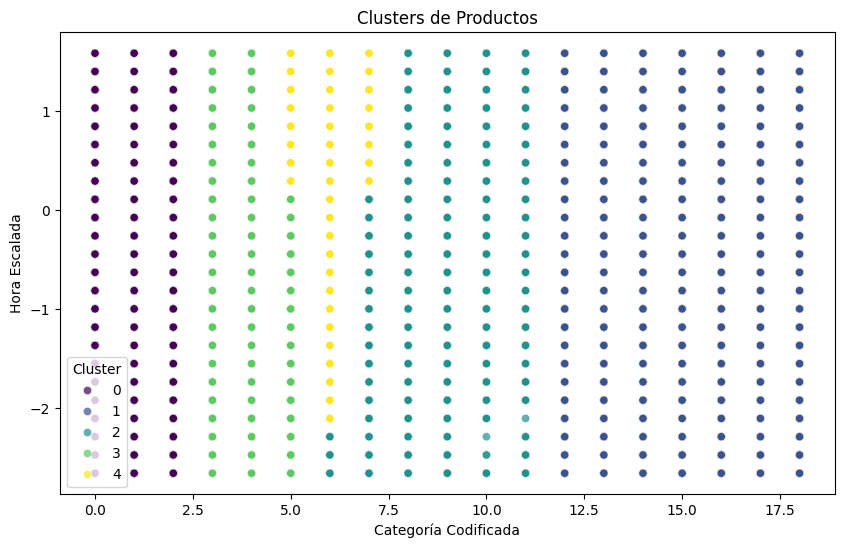

In [280]:

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_copy['categoria_codificada'], y=sales_copy['hour_scaled'], hue=sales_copy['cluster'], palette='viridis', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Categoría Codificada')
plt.ylabel('Hora Escalada')
plt.title('Clusters de Productos')

# Mostrar la leyenda
plt.legend(title='Cluster')
plt.show()

## Random Forest Classifier

In [283]:
# Separar características (X) y variable objetivo (y)
X = sales_copy.drop(columns=["Sales"])
y = sales_copy["Sales"]

In [284]:
# Identificar columnas categóricas y numéricas
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

In [ ]:
# Codificar variables categóricas
encoder = LabelEncoder()
X[categorical_features] = X[categorical_features].apply(encoder.fit_transform)
X_categorical_df = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_features))

ValueError: Shape of passed values is (185950, 1), indices imply (185950, 140823)

In [ ]:
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_features])
X_numerical_df = pd.DataFrame(X_numerical, columns=numerical_features)

In [ ]:
# Combinar datos procesados
X_processed = pd.concat([X_numerical_df, X_categorical_df], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_clf.fit(X_train, y_train)

# Generar predicciones
y_pred_rf = rf_clf.predict(X_test)

# Evaluar modelos
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Exactitud de Regresión Logística: {accuracy_log_reg:.4f}")
print(f"Exactitud de Random Forest: {accuracy_rf:.4f}")

In [ ]:
# Crear matriz de confusión para cada modelo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (model_name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Deserta", "Deserta"],
                yticklabels=["No Deserta", "Deserta"], ax=ax)
    ax.set_title(f"Matriz de Confusión - {model_name}")
    ax.set_xlabel("Predicho")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()